In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper
import warnings

warnings.filterwarnings('ignore')

In [4]:
def build_graph(node: str):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery("""
        CONSTRUCT { wd:Q171076 wdtn:P227 ?val .
                    wd:Q338712 wdtn:P227 ?val1}
        WHERE     { wd:Q171076 wdtn:P227 ?val .
                    wd:Q338712 wdtn:P227 ?val1}
                """)
    query_result = sparql.queryAndConvert()  # Produces an RDFlib Graph object 
    query_df = pd.DataFrame(query_result, columns=["Subject", "Property", "Value"])
    query_df["Subject"] = query_df["Subject"].str.replace("rdflib.term.URIRef", "")
    query_df["Value"] = query_df["Value"].str.replace("rdflib.term.URIRef", "")
    discard_properties = ["P921", "P2860"]
    query_df = query_df[~query_df.Property.str.contains('|'.join(discard_properties))]

    G = nx.Graph()
    G = nx.from_pandas_edgelist(query_df, "Subject", "Value")
    return G

test2 = build_graph('e')

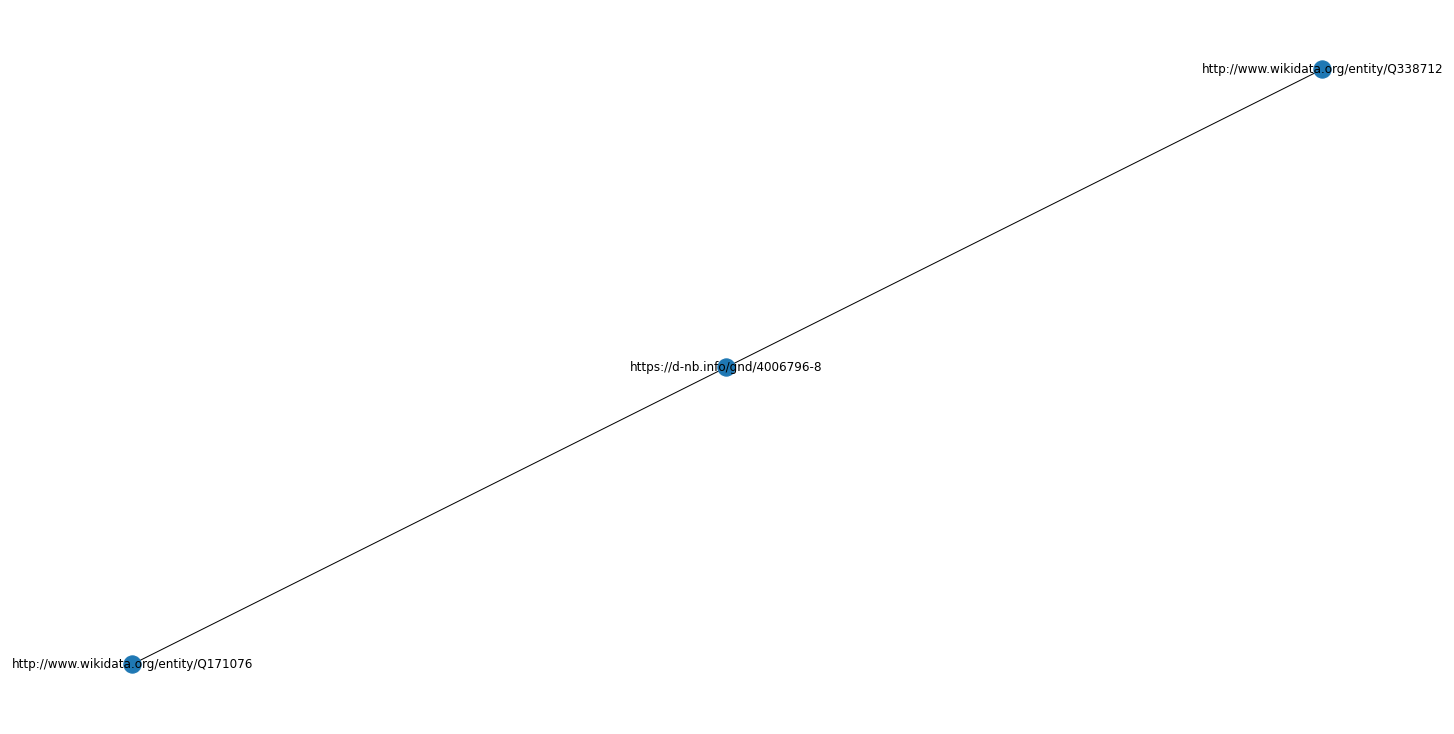

In [6]:
plt.figure(figsize=(20,10))
nx.draw(test2, with_labels=True)